这个案例尽管准确率能看，但是在rqalpha里跑的效果很差，因为太多停牌的股票，月度换仓买不进去。

但还是有地方可以调整的，因子的选择，中性化的处理。


In [110]:
from fxdayu_data import DataAPI
import pandas as pd
import numpy as np
from datetime import datetime

# codes = tuple(DataAPI.info.codes('金融行业') + DataAPI.info.codes('机械行业'))
codes = DataAPI.info.codes('金融行业')

In [111]:
factors = pd.read_excel("classify.xlsx", sheetname="价值类").iloc[:, 0].tolist()
factors.append("close")

In [112]:
pn = DataAPI.factor(codes, tuple(factors), start=datetime(2010, 1, 1), end=datetime(2017, 1, 31))
pn = pn.resample("M", axis=1).last()

In [113]:
pn = pn.transpose(2,1,0)
pn

<class 'pandas.core.panel.Panel'>
Dimensions: 14 (items) x 85 (major_axis) x 50 (minor_axis)
Items axis: CTOP to close
Major_axis axis: 2010-01-31 00:00:00 to 2017-01-31 00:00:00
Minor_axis axis: 000001.XSHE to 601998.XSHG

In [114]:
pn['ret'] = pn['close'].pct_change()
close = pn['close']
pn = pn.drop('close')

In [115]:
from ML.base import RollingClf

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
clf = RollingClf(pn)

Axes of input panel should be [factors, time, stocks], 
and the last column of factor should be 'ret', 
 pn = pn.transpose(2,1,0)


In [118]:
clf.classifiers

{'ABC': AdaBoostClassifier(algorithm='SAMME.R',
           base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
           learning_rate=1.0, n_estimators=5, random_state=None)}

In [119]:
# clf.cut(func="equal", num=5)

In [120]:
clf.pn.iloc[0, :, :]

,000001.XSHE,000166.XSHE,000415.XSHE,000563.XSHE,000686.XSHE,000712.XSHE,000728.XSHE,000750.XSHE,000776.XSHE,000783.XSHE,...,601555.XSHG,601601.XSHG,601628.XSHG,601688.XSHG,601788.XSHG,601818.XSHG,601901.XSHG,601939.XSHG,601988.XSHG,601998.XSHG
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.0012,NaN,NaN,0.0024,0.0055,0.0027,0.0071,NaN,NaN,0.0044,...,NaN,0.0122,0.0085,NaN,0.0223,NaN,NaN,0.0148,0.0317,0.0123
2010-02-28,0.0011,NaN,NaN,0.0021,0.0053,0.0026,0.0074,NaN,NaN,0.0044,...,NaN,0.0113,0.0085,NaN,0.0218,NaN,NaN,0.0149,0.0314,0.0123
2010-03-31,0.0011,NaN,NaN,0.0021,0.0045,0.0020,0.0279,NaN,NaN,0.0046,...,NaN,0.0099,0.0081,NaN,0.0189,NaN,NaN,0.0356,0.0326,0.0116
2010-04-30,0.0013,NaN,NaN,0.0043,0.0053,0.0021,0.0333,NaN,NaN,0.0278,...,NaN,0.0118,0.0263,NaN,0.0250,NaN,NaN,0.0385,0.0334,0.0145
2010-05-31,0.0015,NaN,NaN,0.0050,0.0067,0.0022,0.0386,NaN,NaN,0.0336,...,NaN,0.0138,0.0290,NaN,0.0316,NaN,NaN,0.0407,0.0342,0.0169
2010-06-30,0.0013,NaN,NaN,0.0053,0.0065,0.0030,0.0412,NaN,NaN,0.0370,...,NaN,0.0132,0.0283,NaN,0.0327,NaN,NaN,0.0430,0.0413,0.0163
2010-07-31,0.0013,NaN,NaN,0.0048,0.0062,0.0027,0.0379,NaN,NaN,0.0330,...,NaN,0.0129,0.0293,NaN,0.0291,NaN,NaN,0.0408,0.0391,0.0147
2010-08-31,0.0013,NaN,NaN,0.0043,0.0067,0.0024,0.0401,NaN,NaN,0.0353,...,NaN,0.0128,0.0314,NaN,0.0325,NaN,NaN,0.0432,0.0420,0.0156
2010-09-30,0.0014,NaN,NaN,0.0047,0.0070,0.0029,0.0419,NaN,NaN,0.0376,...,NaN,0.0138,0.0325,NaN,0.0352,NaN,NaN,0.0439,0.0419,0.0173


# 必须先split再label

In [121]:
clf.split(ret_fwd=1, train_len=20, remodel_freq=1)

In [96]:
# clf.label(func='pct', pct_list=[30,70], labels=[-1, np.nan, 1])

In [122]:
clf.label(func='equal', num=2)

ret  label
datetime   minor                       
2010-02-28 000001.XSHE  0.034557      2
           000563.XSHE  0.113058      2
           000686.XSHE  0.027365      2
           000712.XSHE  0.047757      2
           000728.XSHE -0.044795      1
           000783.XSHE -0.004522      1
           002142.XSHE  0.019365      2
           600000.XSHG  0.057193      2
           600015.XSHG  0.018616      2
           600016.XSHG  0.013909      1
           600030.XSHG -0.033931      1
           600036.XSHG  0.048064      2
           600109.XSHG -0.020282      1
           600291.XSHG -0.006344      1
           600369.XSHG  0.019461      2
           600643.XSHG  0.041355      2
           600816.XSHG  0.053869      2
           600830.XSHG  0.168788      2
           600837.XSHG  0.004708      1
           600999.XSHG  0.012971      1
           601009.XSHG  0.017782      1
           601099.XSHG -0.017514      1
           601166.XSHG  0.078712      2
           601169.XSHG  0.026349      2
           601318.XSHG -0.031219      1
           601328.XSHG  0.003672      1
           601398.XSHG  0.004218      1
           601601.XSHG  0.074644      2
           601628.XSHG -0.002582      1
           601788.XSHG  0.020374      2
...                          ...    ...
2017-01-31 600291.XSHG  0.016120      1
           600369.XSHG -0.026648      1
           600643.XSHG  0.112006      2
           600705.XSHG  0.016340      1
           600816.XSHG  0.068152      2
           600830.XSHG -0.011454      1
           600837.XSHG  0.030476      2
           600958.XSHG -0.020605      1
           600999.XSHG  0.026332      2
           601009.XSHG  0.059963      2
           601099.XSHG -0.021493      1
           601166.XSHG  0.057643      2
           601169.XSHG  0.033811      2
           601198.XSHG -0.043868      1
           601288.XSHG  0.035484      2
           601318.XSHG  0.030483      2
           601328.XSHG  0.043328      2
           601336.XSHG  0.054591      2
           601377.XSHG  0.022222      1
           601398.XSHG  0.043084      2
           601555.XSHG -0.030166      1
           601601.XSHG  0.045013      2
           601628.XSHG  0.067677      2
           601688.XSHG  0.034155      2
           601788.XSHG  0.000625      1
           601818.XSHG  0.043478      2
           601901.XSHG  0.019737      1
           601939.XSHG  0.056985      2
           601988.XSHG  0.040698      2
           601998.XSHG  0.088924      2

[3718 rows x 2 columns]

In [123]:
from sklearn.svm import SVC

In [124]:
from sklearn.tree import DecisionTreeClassifier
clf.predict(classifier=SVC(probability=True), save=True)

In [125]:
clf.result

ret  predict         1         2
datetime   minor                                             
2011-09-30 000563.XSHE -0.057246      2.0  0.547873  0.452127
           000686.XSHE -0.109916      1.0  0.491879  0.508121
           000728.XSHE -0.014790      1.0  0.425951  0.574049
           000783.XSHE  0.003608      1.0  0.425085  0.574915
           002142.XSHE -0.073735      1.0  0.428025  0.571975
           600000.XSHG -0.080718      1.0  0.493239  0.506761
           600015.XSHG -0.040783      1.0  0.493240  0.506760
           600016.XSHG -0.078525      1.0  0.493149  0.506851
           600030.XSHG -0.075646      2.0  0.545353  0.454647
           600036.XSHG -0.066771      1.0  0.492211  0.507789
           600830.XSHG -0.140322      1.0  0.493239  0.506761
           600837.XSHG -0.017385      1.0  0.424723  0.575277
           601009.XSHG -0.018249      1.0  0.467895  0.532105
           601166.XSHG -0.070588      1.0  0.493480  0.506520
           601169.XSHG -0.056355      2.0  0.518874  0.481126
           601318.XSHG -0.172725      1.0  0.460300  0.539700
           601328.XSHG -0.058964      1.0  0.500000  0.500000
           601398.XSHG -0.038720      2.0  0.515898  0.484102
           601601.XSHG -0.107644      1.0  0.444015  0.555985
           601628.XSHG -0.074704      1.0  0.433079  0.566921
           601939.XSHG -0.041582      1.0  0.500000  0.500000
           601988.XSHG -0.049670      1.0  0.494210  0.505790
           601998.XSHG -0.035762      1.0  0.479582  0.520418
2011-10-31 000563.XSHE  0.043026      1.0  0.493898  0.506102
           000686.XSHE  0.048212      1.0  0.494593  0.505407
           000728.XSHE  0.065375      2.0  0.558125  0.441875
           000783.XSHE  0.063431      2.0  0.506166  0.493834
           002142.XSHE  0.076463      1.0  0.458145  0.541855
           600000.XSHG  0.078574      1.0  0.494593  0.505407
           600015.XSHG  0.097958      2.0  0.566142  0.433858
...                          ...      ...       ...       ...
2016-12-31 600015.XSHG -0.060606      2.0  0.440864  0.559136
           600016.XSHG -0.044211      2.0  0.483373  0.516627
           600030.XSHG -0.095211      2.0  0.443264  0.556736
           600036.XSHG -0.051226      1.0  0.510745  0.489255
           600109.XSHG -0.077891      2.0  0.451737  0.548263
           600369.XSHG -0.085897      1.0  0.563414  0.436586
           600705.XSHG -0.089286      2.0  0.490764  0.509236
           600816.XSHG  0.009416      2.0  0.469138  0.530862
           600837.XSHG -0.060263      1.0  0.538289  0.461711
           600999.XSHG -0.144130      2.0  0.436087  0.563913
           601009.XSHG -0.059028      2.0  0.478349  0.521651
           601099.XSHG -0.154329      2.0  0.451690  0.548310
           601166.XSHG -0.041618      1.0  0.558666  0.441334
           601169.XSHG -0.035573      2.0  0.438570  0.561430
           601288.XSHG -0.034268      2.0  0.438345  0.561655
           601318.XSHG -0.024773      1.0  0.535113  0.464887
           601328.XSHG -0.015358      1.0  0.553879  0.446121
           601336.XSHG -0.053405      2.0  0.432793  0.567207
           601377.XSHG -0.115607      2.0  0.465337  0.534663
           601398.XSHG -0.024336      1.0  0.524919  0.475081
           601555.XSHG -0.091073      1.0  0.500000  0.500000
           601601.XSHG -0.080768      1.0  0.506977  0.493023
           601628.XSHG -0.065916      2.0  0.490153  0.509847
           601688.XSHG -0.099344      1.0  0.500000  0.500000
           601788.XSHG -0.092509      2.0  0.449616  0.550384
           601818.XSHG -0.044010      2.0  0.500000  0.500000
           601901.XSHG -0.109027      1.0  0.561982  0.438018
           601939.XSHG -0.023339      2.0  0.484315  0.515685
           601988.XSHG -0.019943      1.0  0.500000  0.500000
           601998.XSHG -0.046131      2.0  0.500000  0.500000

[2173 rows x 4 columns]

总体预测的准确率

In [141]:
clf.result.apply(lambda x:x["ret"]*(x["predict"]-1.5), axis=1).apply(np.sign).value_counts()

 1.0    1133
-1.0    1027
 0.0      13
dtype: int64

预测为买的时候的准确率

In [127]:
clf.result[clf.result.predict==2].apply(lambda x:x["ret"]*x["predict"], axis=1).apply(np.sign).value_counts()

 1.0    576
-1.0    436
 0.0      6
dtype: int64

In [128]:
clf.result.groupby(level=0).apply(lambda x: x.iloc[:,-1].nunique())

datetime
2011-09-30    21
2011-10-31    20
2011-11-30    21
2011-12-31    23
2012-01-31    21
2012-02-29    22
2012-03-31    20
2012-04-30    24
2012-05-31    24
2012-06-30    21
2012-07-31    23
2012-08-31    25
2012-09-30    23
2012-10-31    24
2012-11-30    24
2012-12-31    22
2013-01-31    19
2013-02-28    24
2013-03-31    24
2013-04-30    32
2013-05-31    28
2013-06-30    20
2013-07-31    25
2013-08-31    18
2013-09-30    28
2013-10-31    34
2013-11-30    33
2013-12-31    31
2014-01-31    26
2014-02-28    30
              ..
2014-07-31    34
2014-08-31    31
2014-09-30    30
2014-10-31    31
2014-11-30    27
2014-12-31    29
2015-01-31    20
2015-02-28    30
2015-03-31    33
2015-04-30    36
2015-05-31    37
2015-06-30    34
2015-07-31    38
2015-08-31    35
2015-09-30    34
2015-10-31    17
2015-11-30    34
2015-12-31    35
2016-01-31    36
2016-02-29    30
2016-03-31    34
2016-04-30    38
2016-05-31    39
2016-06-30    35
2016-07-31    29
2016-08-31    25
2016-09-30    36
2016-

In [129]:
from ML.base import equal_cut

In [130]:
import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    clf.result.iloc[:, -1].apply(lambda x: x+np.random.random()/1000000), close, quantiles=5)
factor_data.iloc[:, -2] = clf.result.iloc[:, -1]
factor_data

1         5        10    factor  \
date       asset                                                 
2011-09-30 000563.XSHE  0.043026 -0.047883  0.115198  0.452127   
           000686.XSHE  0.048212 -0.116062 -0.091893  0.508121   
           000728.XSHE  0.065375 -0.016142  0.070864  0.574049   
           000783.XSHE  0.063431  0.005650 -0.003082  0.574915   
           002142.XSHE  0.076463  0.079605  0.118061  0.571975   
           600000.XSHG  0.078574  0.117218 -0.069558  0.506761   
           600015.XSHG  0.097958  0.144409 -0.108260  0.506760   
           600016.XSHG  0.106781  0.193817  0.143674  0.506851   
           600030.XSHG  0.066667  0.048902  0.086228  0.454647   
           600036.XSHG  0.094085  0.163725 -0.069521  0.507789   
           600830.XSHG -0.018256 -0.158692 -0.170982  0.506761   
           600837.XSHG  0.150459  0.132766  0.209848  0.575277   
           601009.XSHG  0.096175  0.189655  0.050108  0.532105   
           601166.XSHG  0.073538  0.155063  0.033454  0.506520   
           601169.XSHG  0.099793  0.160290  0.003619  0.481126   
           601318.XSHG  0.152222  0.215930  0.325234  0.539700   
           601328.XSHG  0.051369  0.120519 -0.001411  0.500000   
           601398.XSHG  0.085220  0.112850 -0.010652  0.484102   
           601601.XSHG  0.070301  0.136292  0.192387  0.555985   
           601628.XSHG  0.133624  0.267986  0.289999  0.566921   
           601939.XSHG  0.095570  0.109223 -0.047027  0.500000   
           601988.XSHG  0.052266  0.077243  0.007863  0.505790   
           601998.XSHG  0.034858  0.063023 -0.042108  0.520418   
2011-10-31 000563.XSHE -0.019627 -0.134065  0.046574  0.506102   
           000686.XSHE -0.161042 -0.190104 -0.161042  0.505407   
           000728.XSHE -0.127424 -0.042576 -0.010000  0.441875   
           000783.XSHE -0.163246 -0.078966 -0.156484  0.493834   
           002142.XSHE -0.089102 -0.082152 -0.020573  0.541855   
           600000.XSHG -0.077229 -0.030454 -0.142914  0.505407   
           600015.XSHG -0.063971 -0.033265 -0.193279  0.433858   
...                          ...       ...       ...       ...   
2016-03-31 600015.XSHG  0.001021  0.072996  0.183257  0.500000   
           600016.XSHG  0.020803  0.040249  0.045789  0.486985   
           600030.XSHG -0.076398 -0.022613 -0.046903  0.487892   
           600036.XSHG  0.103183  0.204828  0.228768  0.474231   
           600109.XSHG -0.094945 -0.064277 -0.067778  0.478567   
           600291.XSHG -0.032176 -0.197674 -0.224355  0.489131   
           600369.XSHG -0.052833 -0.097538 -0.170452  0.487049   
           600705.XSHG -0.079681  0.127587  0.013525  0.477934   
           600816.XSHG -0.033260  0.223104  0.535998  0.468190   
           600837.XSHG  0.051730  0.139650  0.167710  0.484694   
           600999.XSHG -0.064825  0.020233 -0.039376  0.489340   
           601009.XSHG  0.044145  0.245425  0.314044  0.494149   
           601099.XSHG -0.051560 -0.011950  0.108210  0.512175   
           601166.XSHG  0.038005  0.075314  0.142222  0.463333   
           601169.XSHG  0.021827  0.094988  0.230338  0.510263   
           601288.XSHG -0.025049  0.058009  0.058009  0.445831   
           601318.XSHG  0.007223  0.087512  0.166938  0.477495   
           601328.XSHG -0.034061  0.091457  0.132857  0.460756   
           601336.XSHG -0.016507  0.083751  0.146056  0.490605   
           601377.XSHG -0.070531 -0.082632 -0.098767  0.489131   
           601398.XSHG -0.006871  0.111656  0.128834  0.489131   
           601555.XSHG -0.082031  0.072822 -0.017257  0.511944   
           601601.XSHG  0.052573  0.087490  0.148852  0.516242   
           601628.XSHG -0.090929 -0.076472  0.100207  0.489131   
           601688.XSHG  0.017584  0.225470  0.108444  0.490819   
           601788.XSHG -0.091107 -0.056881 -0.130765  0.489131   
           601818.XSHG -0.026633  0.101766  0.143818  0.478986   
           601939.XSHG -0.033123  0.148398  0.252996  0.483211   
     

In [131]:
factor_data.iloc[:, -1] = clf.result.iloc[:,-1].groupby(level=0).transform(lambda x: equal_cut(x, num=5)).\
                            rename("factor_quantile").reindex_like(factor_data.iloc[:,-1])
factor_data

1         5        10    factor  \
date       asset                                                 
2011-09-30 000563.XSHE  0.043026 -0.047883  0.115198  0.452127   
           000686.XSHE  0.048212 -0.116062 -0.091893  0.508121   
           000728.XSHE  0.065375 -0.016142  0.070864  0.574049   
           000783.XSHE  0.063431  0.005650 -0.003082  0.574915   
           002142.XSHE  0.076463  0.079605  0.118061  0.571975   
           600000.XSHG  0.078574  0.117218 -0.069558  0.506761   
           600015.XSHG  0.097958  0.144409 -0.108260  0.506760   
           600016.XSHG  0.106781  0.193817  0.143674  0.506851   
           600030.XSHG  0.066667  0.048902  0.086228  0.454647   
           600036.XSHG  0.094085  0.163725 -0.069521  0.507789   
           600830.XSHG -0.018256 -0.158692 -0.170982  0.506761   
           600837.XSHG  0.150459  0.132766  0.209848  0.575277   
           601009.XSHG  0.096175  0.189655  0.050108  0.532105   
           601166.XSHG  0.073538  0.155063  0.033454  0.506520   
           601169.XSHG  0.099793  0.160290  0.003619  0.481126   
           601318.XSHG  0.152222  0.215930  0.325234  0.539700   
           601328.XSHG  0.051369  0.120519 -0.001411  0.500000   
           601398.XSHG  0.085220  0.112850 -0.010652  0.484102   
           601601.XSHG  0.070301  0.136292  0.192387  0.555985   
           601628.XSHG  0.133624  0.267986  0.289999  0.566921   
           601939.XSHG  0.095570  0.109223 -0.047027  0.500000   
           601988.XSHG  0.052266  0.077243  0.007863  0.505790   
           601998.XSHG  0.034858  0.063023 -0.042108  0.520418   
2011-10-31 000563.XSHE -0.019627 -0.134065  0.046574  0.506102   
           000686.XSHE -0.161042 -0.190104 -0.161042  0.505407   
           000728.XSHE -0.127424 -0.042576 -0.010000  0.441875   
           000783.XSHE -0.163246 -0.078966 -0.156484  0.493834   
           002142.XSHE -0.089102 -0.082152 -0.020573  0.541855   
           600000.XSHG -0.077229 -0.030454 -0.142914  0.505407   
           600015.XSHG -0.063971 -0.033265 -0.193279  0.433858   
...                          ...       ...       ...       ...   
2016-03-31 600015.XSHG  0.001021  0.072996  0.183257  0.500000   
           600016.XSHG  0.020803  0.040249  0.045789  0.486985   
           600030.XSHG -0.076398 -0.022613 -0.046903  0.487892   
           600036.XSHG  0.103183  0.204828  0.228768  0.474231   
           600109.XSHG -0.094945 -0.064277 -0.067778  0.478567   
           600291.XSHG -0.032176 -0.197674 -0.224355  0.489131   
           600369.XSHG -0.052833 -0.097538 -0.170452  0.487049   
           600705.XSHG -0.079681  0.127587  0.013525  0.477934   
           600816.XSHG -0.033260  0.223104  0.535998  0.468190   
           600837.XSHG  0.051730  0.139650  0.167710  0.484694   
           600999.XSHG -0.064825  0.020233 -0.039376  0.489340   
           601009.XSHG  0.044145  0.245425  0.314044  0.494149   
           601099.XSHG -0.051560 -0.011950  0.108210  0.512175   
           601166.XSHG  0.038005  0.075314  0.142222  0.463333   
           601169.XSHG  0.021827  0.094988  0.230338  0.510263   
           601288.XSHG -0.025049  0.058009  0.058009  0.445831   
           601318.XSHG  0.007223  0.087512  0.166938  0.477495   
           601328.XSHG -0.034061  0.091457  0.132857  0.460756   
           601336.XSHG -0.016507  0.083751  0.146056  0.490605   
           601377.XSHG -0.070531 -0.082632 -0.098767  0.489131   
           601398.XSHG -0.006871  0.111656  0.128834  0.489131   
           601555.XSHG -0.082031  0.072822 -0.017257  0.511944   
           601601.XSHG  0.052573  0.087490  0.148852  0.516242   
           601628.XSHG -0.090929 -0.076472  0.100207  0.489131   
           601688.XSHG  0.017584  0.225470  0.108444  0.490819   
           601788.XSHG -0.091107 -0.056881 -0.130765  0.489131   
           601818.XSHG -0.026633  0.101766  0.143818  0.478986   
           601939.XSHG -0.033123  0.148398  0.252996  0.483211   
     

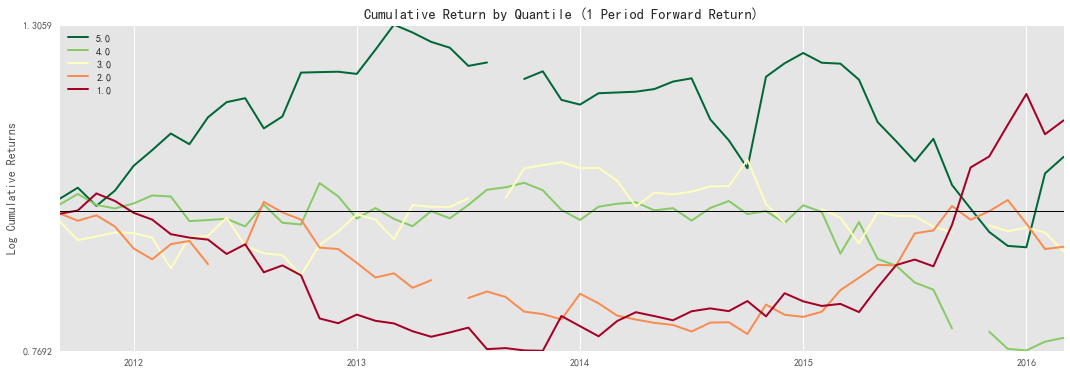

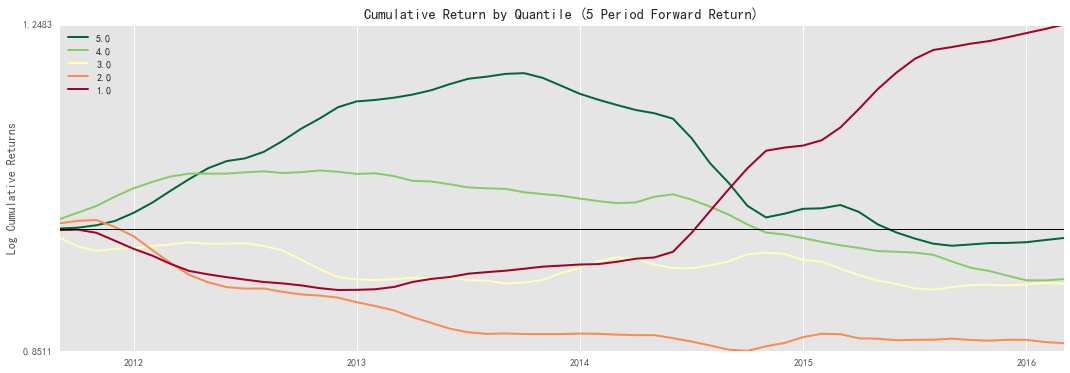

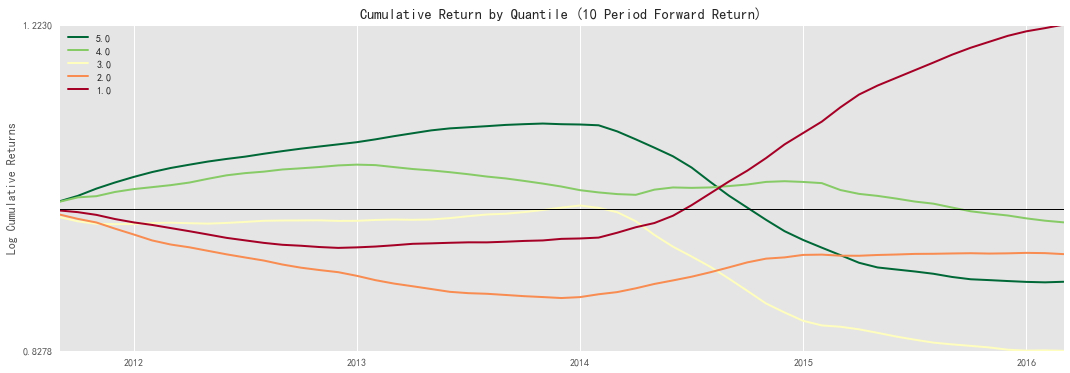

In [132]:
import matplotlib.pyplot as plt

mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)

alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 1)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 5)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 10)
plt.show()

In [133]:
clf.result

ret  predict         1         2
datetime   minor                                             
2011-09-30 000563.XSHE -0.057246      2.0  0.547873  0.452127
           000686.XSHE -0.109916      1.0  0.491879  0.508121
           000728.XSHE -0.014790      1.0  0.425951  0.574049
           000783.XSHE  0.003608      1.0  0.425085  0.574915
           002142.XSHE -0.073735      1.0  0.428025  0.571975
           600000.XSHG -0.080718      1.0  0.493239  0.506761
           600015.XSHG -0.040783      1.0  0.493240  0.506760
           600016.XSHG -0.078525      1.0  0.493149  0.506851
           600030.XSHG -0.075646      2.0  0.545353  0.454647
           600036.XSHG -0.066771      1.0  0.492211  0.507789
           600830.XSHG -0.140322      1.0  0.493239  0.506761
           600837.XSHG -0.017385      1.0  0.424723  0.575277
           601009.XSHG -0.018249      1.0  0.467895  0.532105
           601166.XSHG -0.070588      1.0  0.493480  0.506520
           601169.XSHG -0.056355      2.0  0.518874  0.481126
           601318.XSHG -0.172725      1.0  0.460300  0.539700
           601328.XSHG -0.058964      1.0  0.500000  0.500000
           601398.XSHG -0.038720      2.0  0.515898  0.484102
           601601.XSHG -0.107644      1.0  0.444015  0.555985
           601628.XSHG -0.074704      1.0  0.433079  0.566921
           601939.XSHG -0.041582      1.0  0.500000  0.500000
           601988.XSHG -0.049670      1.0  0.494210  0.505790
           601998.XSHG -0.035762      1.0  0.479582  0.520418
2011-10-31 000563.XSHE  0.043026      1.0  0.493898  0.506102
           000686.XSHE  0.048212      1.0  0.494593  0.505407
           000728.XSHE  0.065375      2.0  0.558125  0.441875
           000783.XSHE  0.063431      2.0  0.506166  0.493834
           002142.XSHE  0.076463      1.0  0.458145  0.541855
           600000.XSHG  0.078574      1.0  0.494593  0.505407
           600015.XSHG  0.097958      2.0  0.566142  0.433858
...                          ...      ...       ...       ...
2016-12-31 600015.XSHG -0.060606      2.0  0.440864  0.559136
           600016.XSHG -0.044211      2.0  0.483373  0.516627
           600030.XSHG -0.095211      2.0  0.443264  0.556736
           600036.XSHG -0.051226      1.0  0.510745  0.489255
           600109.XSHG -0.077891      2.0  0.451737  0.548263
           600369.XSHG -0.085897      1.0  0.563414  0.436586
           600705.XSHG -0.089286      2.0  0.490764  0.509236
           600816.XSHG  0.009416      2.0  0.469138  0.530862
           600837.XSHG -0.060263      1.0  0.538289  0.461711
           600999.XSHG -0.144130      2.0  0.436087  0.563913
           601009.XSHG -0.059028      2.0  0.478349  0.521651
           601099.XSHG -0.154329      2.0  0.451690  0.548310
           601166.XSHG -0.041618      1.0  0.558666  0.441334
           601169.XSHG -0.035573      2.0  0.438570  0.561430
           601288.XSHG -0.034268      2.0  0.438345  0.561655
           601318.XSHG -0.024773      1.0  0.535113  0.464887
           601328.XSHG -0.015358      1.0  0.553879  0.446121
           601336.XSHG -0.053405      2.0  0.432793  0.567207
           601377.XSHG -0.115607      2.0  0.465337  0.534663
           601398.XSHG -0.024336      1.0  0.524919  0.475081
           601555.XSHG -0.091073      1.0  0.500000  0.500000
           601601.XSHG -0.080768      1.0  0.506977  0.493023
           601628.XSHG -0.065916      2.0  0.490153  0.509847
           601688.XSHG -0.099344      1.0  0.500000  0.500000
           601788.XSHG -0.092509      2.0  0.449616  0.550384
           601818.XSHG -0.044010      2.0  0.500000  0.500000
           601901.XSHG -0.109027      1.0  0.561982  0.438018
           601939.XSHG -0.023339      2.0  0.484315  0.515685
           601988.XSHG -0.019943      1.0  0.500000  0.500000
           601998.XSHG -0.046131      2.0  0.500000  0.500000

[2173 rows x 4 columns]

In [108]:
c = clf.result.loc[:, 'predict'].unstack()

[2017-09-18 13:54:03.252952] DEBUG: system_log: 
{'base': {'accounts': {'STOCK': 1000000.0},
          'benchmark': '000300.XSHG',
          'data_bundle_path': 'C:\\Users\\Tianhang\\.rqalpha\\bundle',
          'end_date': datetime.date(2017, 1, 1),
          'frequency': '1d',
          'margin_multiplier': 1,
          'persist': False,
          'persist_mode': PERSIST_MODE.REAL_TIME,
          'resume_mode': False,
          'run_type': RUN_TYPE.BACKTEST,
          'source_code': None,
          'start_date': datetime.date(2011, 10, 1),
          'strategy_file': 'strategy.py'},
 'extra': {'context_vars': None,
           'enable_profiler': False,
           'force_run_init_when_pt_resume': False,
           'is_hold': False,
           'locale': 'zh_Hans_CN',
           'log_level': 'verbose',
           'user_log_disabled': False,
           'user_system_log_disabled': False},
 'mod': {'sys_accounts': {'enabled': True},
         'sys_analyser': {'enabled': True, 'plot': True},
 

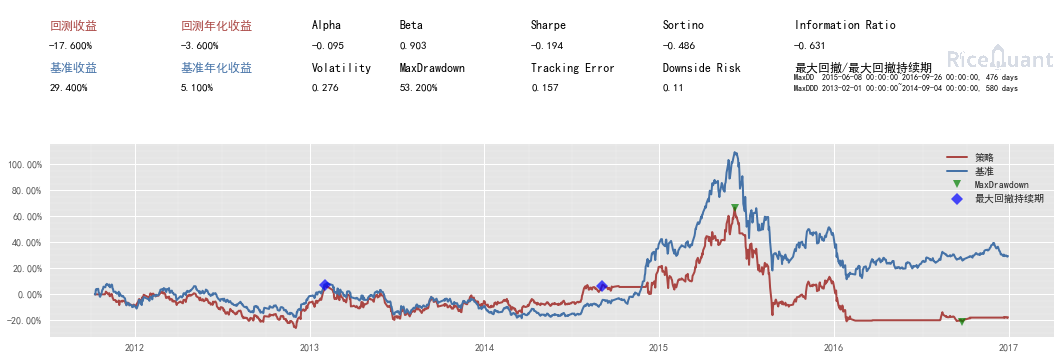

[2017-09-18 13:54:26.845735] DEBUG: system_log: 策略运行成功，正常退出


{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2011-10-10  181.72     999818.28                  1.000   1000000.00   
  2011-10-11  181.72     997828.09                  1.000    998009.81   
  2011-10-12  181.72    1034101.16                  0.998   1034282.88   
  2011-10-13  181.72    1041076.60                  1.034   1041258.32   
  2011-10-14  181.72    1037627.98                  1.041   1037809.70   
  2011-10-17  181.72    1042777.45                  1.038   1042959.17   
  2011-10-18  181.72    1013554.11                  1.043   1013735.83   
  2011-10-19  181.72    1009984.28                  1.014   1010166.00   
  2011-10-20  181.72     985527.23                  1.010    985708.95   
  2011-10-21  181.72     980581.08                  0.986    980762.80   
  2011-10-24  181.72    1007477.97                  0.981   1007659.69   

In [140]:
#coding=utf-8
import rqalpha
from rqalpha.api import *
import pandas as pd

def init(context):
    context.codes = clf.result.loc[:, 'predict'].unstack()
    scheduler.run_daily(find_pool)
    scheduler.run_daily(buy)
    #设置持有时间，可以设置为五天，十天等。
    context.holdperiod = 30
    context.stocks = []
    context.time = []
    

def find_pool(context, bar_dict):
    try:
        codes = context.codes.loc[context.now.date()]
    except KeyError:
        return
    stocks = codes.index[codes == 2]
    context.stocks = stocks

def handle_bar(context, bar_dict):
    hold_period(context, bar_dict)
    buy(context, bar_dict)

def buy(context, bar_dict):
    pool = context.stocks
    if pool is not None:
        stocks_len = len(pool)
    cur_value = context.portfolio.market_value
    for stock in pool:
        if cur_value==0:
            order_target_percent(stock, 1.0/stocks_len)
            buy_time = context.now.replace(tzinfo=None)
            context.time = buy_time

def hold_period( context,bar_dict):
    for stock in context.portfolio.positions:
        buytime=context.time # 获取买入时间
        currenttime=context.now.replace(tzinfo=None) # 获取当前时间
#         print ('buytime='+str(buytime))
#         print('currenttime='+str(currenttime))
        hold_time=(currenttime-buytime).days # 计算持有天数
        if hold_time>context.holdperiod:
            order_target_percent(stock, 0)

config = {
  "base": {
    "start_date": "2011-10-1",
    "end_date": "2017-01-1",
    "accounts": {'stock':1000000},
    "benchmark": "000300.XSHG"
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
        "enabled": True,
        "plot": True
     },
    "sys_simulation": {
        "price_limit":True,
        "enabled": True,
        "commission_multiplier": 0,
        "slippage": 0
    }
  }
}
rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)

In [80]:
len('2011-10-31')

10